In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import math
import random
import warnings
warnings.filterwarnings('ignore')

import keras
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, Activation, LSTM
from keras.engine import input_layer
from keras.models import Sequential
from tensorflow.keras import layers


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
#발전기명, 년월일, 설비용량(MW)	01시	02시	03시	04시	05시	06시	07시	08시	09시	10시	11시	12시	13시	14시	15시	16시	17시	18시	19시	20시	21시	22시	23시	24시

dataset1 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_세종.csv', encoding='cp949')
dataset2 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_안산.csv', encoding='cp949')
dataset3 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_영암.csv', encoding='cp949')

dataset1.head()

,발전기명,년월일,설비용량(MW),1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,세종시폐기물매립장태양광,2017-01-01,1.628,0,0,0,0,0,0,0,...,742080,334440,87240,2880,4320,0,0,0,0,0
1,세종시폐기물매립장태양광,2017-01-02,1.628,0,0,0,0,0,0,0,...,606360,501120,158280,2760,3360,0,0,0,0,0
2,세종시폐기물매립장태양광,2017-01-03,1.628,0,0,0,0,0,0,0,...,881040,557040,128640,2280,3000,0,0,0,0,0
3,세종시폐기물매립장태양광,2017-01-04,1.628,0,0,0,0,0,0,0,...,677280,502320,112080,1800,2760,0,0,0,0,0
4,세종시폐기물매립장태양광,2017-01-05,1.628,0,0,0,0,0,0,0,...,259560,138840,45000,2520,2880,0,0,0,0,0


### * nan 값 0으로 대체

In [3]:
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("Before : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)

dataset1, dataset2, dataset3 = dataset1.fillna(0), dataset2.fillna(0), dataset3.fillna(0)
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("After : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)


Before :  0 0 0
After :  0 0 0


In [4]:
new_dataset1, new_dataset2, new_dataset3 = [], [], []

for i in range(len(dataset1)):
    new_dataset1.extend(dataset1.iloc[i,3:])

for i in range(len(dataset2)):
    new_dataset2.extend(dataset2.iloc[i,3:])

for i in range(len(dataset3)):
    new_dataset3.extend(dataset3.iloc[i,3:])
    
len(new_dataset1), len(new_dataset2), len(new_dataset3)

(40608, 40608, 40608)

In [5]:
df = pd.DataFrame({'local1':new_dataset1,
                   'local2':new_dataset2,
                   'local3':new_dataset3})


train_dataset = df.sample(frac=0.857,random_state=0)
test_dataset = df.drop(train_dataset.index)

train_stats = train_dataset.describe()
#train_stats.pop("local3")
train_stats = train_stats.transpose()

#레이블
train_labels = train_dataset['local1']
test_labels = test_dataset['local1']

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_data = np.array(normed_train_data)
normed_test_data = np.array(normed_test_data)

normed_train_data = np.reshape(normed_train_data, (normed_train_data.shape[0], 1, normed_train_data.shape[1]))
normed_test_data = np.reshape(normed_test_data, (normed_test_data.shape[0], 1, normed_test_data.shape[1]))

In [6]:
def build_model():
    model = keras.Sequential([
    layers.LSTM(64, activation='relu', input_shape=(1,len(train_dataset.keys()))),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',  optimizer='adam', metrics=['mae', 'mse'])
    return model

In [7]:
model = build_model()

In [8]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1) #bactch_size

Epoch 1/1000
870/870 [==============================] - 10s 5ms/step - loss: 131733725184.0000 - mae: 186579.5312 - mse: 131733725184.0000 - val_loss: 9415184384.0000 - val_mae: 51087.5117 - val_mse: 9415184384.0000
Epoch 2/1000
870/870 [==============================] - 3s 3ms/step - loss: 7984474112.0000 - mae: 48112.1367 - mse: 7984474112.0000 - val_loss: 6283658240.0000 - val_mae: 43030.3086 - val_mse: 6283658240.0000
Epoch 3/1000
870/870 [==============================] - 2s 3ms/step - loss: 4926377984.0000 - mae: 39341.3320 - mse: 4926377984.0000 - val_loss: 3322084608.0000 - val_mae: 33180.7852 - val_mse: 3322084608.0000
Epoch 4/1000
870/870 [==============================] - 2s 3ms/step - loss: 2067878656.0000 - mae: 27005.2344 - mse: 2067878656.0000 - val_loss: 754257344.0000 - val_mae: 18362.2129 - val_mse: 754257344.0000
Epoch 5/1000
870/870 [==============================] - 3s 3ms/step - loss: 273243008.0000 - mae: 11080.2412 - mse: 273243008.0000 - val_loss: 139323344.000

870/870 [==============================] - 2s 3ms/step - loss: 32038.6914 - mae: 90.3796 - mse: 32038.6914 - val_loss: 472396.6562 - val_mae: 419.4402 - val_mse: 472396.6562
Epoch 44/1000
870/870 [==============================] - 2s 3ms/step - loss: 33429.0547 - mae: 91.0000 - mse: 33429.0547 - val_loss: 9680.9766 - val_mae: 63.2326 - val_mse: 9680.9766
Epoch 45/1000
870/870 [==============================] - 2s 2ms/step - loss: 23331.1934 - mae: 79.4429 - mse: 23331.1934 - val_loss: 14522.7422 - val_mae: 80.9655 - val_mse: 14522.7422
Epoch 46/1000
870/870 [==============================] - 2s 3ms/step - loss: 19130.5254 - mae: 76.6961 - mse: 19130.5254 - val_loss: 8638.6641 - val_mae: 47.9686 - val_mse: 8638.6641
Epoch 47/1000
870/870 [==============================] - 2s 3ms/step - loss: 19443.9629 - mae: 75.0654 - mse: 19443.9629 - val_loss: 9914.6172 - val_mae: 62.4411 - val_mse: 9914.6172
Epoch 48/1000
870/870 [==============================] - 2s 3ms/step - loss: 27150.1934 - ma

Epoch 88/1000
870/870 [==============================] - 2s 3ms/step - loss: 24007.7422 - mae: 70.8249 - mse: 24007.7422 - val_loss: 3003.0872 - val_mae: 28.4322 - val_mse: 3003.0872
Epoch 89/1000
870/870 [==============================] - 2s 3ms/step - loss: 5100.1616 - mae: 44.2047 - mse: 5100.1616 - val_loss: 3768.1777 - val_mae: 44.3875 - val_mse: 3768.1777
Epoch 90/1000
870/870 [==============================] - 3s 3ms/step - loss: 12264.5088 - mae: 53.0999 - mse: 12264.5088 - val_loss: 4245.3604 - val_mae: 37.2871 - val_mse: 4245.3604
Epoch 91/1000
870/870 [==============================] - 2s 3ms/step - loss: 32656.7090 - mae: 78.6874 - mse: 32656.7090 - val_loss: 8972.1582 - val_mae: 54.3925 - val_mse: 8972.1582
Epoch 92/1000
870/870 [==============================] - 3s 3ms/step - loss: 4459.4956 - mae: 41.6309 - mse: 4459.4956 - val_loss: 2873.7866 - val_mae: 37.4498 - val_mse: 2873.7866
Epoch 93/1000
870/870 [==============================] - 3s 3ms/step - loss: 7038.2134 - 

Epoch 133/1000
870/870 [==============================] - 2s 3ms/step - loss: 8606.1553 - mae: 47.2762 - mse: 8606.1553 - val_loss: 3301.9395 - val_mae: 33.2753 - val_mse: 3301.9395
Epoch 134/1000
870/870 [==============================] - 2s 3ms/step - loss: 17244.7422 - mae: 63.6486 - mse: 17244.7422 - val_loss: 7726.2158 - val_mae: 50.3612 - val_mse: 7726.2158
Epoch 135/1000
870/870 [==============================] - 3s 3ms/step - loss: 6102.8701 - mae: 44.2779 - mse: 6102.8701 - val_loss: 1898.2443 - val_mae: 23.7472 - val_mse: 1898.2443
Epoch 136/1000
870/870 [==============================] - 3s 3ms/step - loss: 9560.2500 - mae: 51.4777 - mse: 9560.2500 - val_loss: 3800.9094 - val_mae: 35.9113 - val_mse: 3800.9094
Epoch 137/1000
870/870 [==============================] - 3s 3ms/step - loss: 11037.4756 - mae: 54.5357 - mse: 11037.4756 - val_loss: 1843.7318 - val_mae: 26.7014 - val_mse: 1843.7318
Epoch 138/1000
870/870 [==============================] - 2s 3ms/step - loss: 17662.54

Epoch 178/1000
870/870 [==============================] - 3s 3ms/step - loss: 19414.2578 - mae: 48.4307 - mse: 19414.2578 - val_loss: 1885.3937 - val_mae: 28.5375 - val_mse: 1885.3937
Epoch 179/1000
870/870 [==============================] - 3s 3ms/step - loss: 13182.0996 - mae: 47.4593 - mse: 13182.0996 - val_loss: 1615.7208 - val_mae: 28.6211 - val_mse: 1615.7208
Epoch 180/1000
870/870 [==============================] - 3s 3ms/step - loss: 5246.5200 - mae: 42.4658 - mse: 5246.5200 - val_loss: 1364.3445 - val_mae: 18.5243 - val_mse: 1364.3445
Epoch 181/1000
870/870 [==============================] - 3s 3ms/step - loss: 16722.4453 - mae: 58.6659 - mse: 16722.4453 - val_loss: 18670.8594 - val_mae: 81.7300 - val_mse: 18670.8594
Epoch 182/1000
870/870 [==============================] - 3s 3ms/step - loss: 4066.2932 - mae: 36.3624 - mse: 4066.2932 - val_loss: 5367.1582 - val_mae: 47.9408 - val_mse: 5367.1582
Epoch 183/1000
870/870 [==============================] - 2s 3ms/step - loss: 3315

Epoch 223/1000
870/870 [==============================] - 3s 3ms/step - loss: 55315.3789 - mae: 75.5300 - mse: 55315.3789 - val_loss: 3427.0310 - val_mae: 41.6180 - val_mse: 3427.0310
Epoch 224/1000
870/870 [==============================] - 3s 3ms/step - loss: 1321.5087 - mae: 21.7581 - mse: 1321.5087 - val_loss: 994.8662 - val_mae: 15.0387 - val_mse: 994.8662
Epoch 225/1000
870/870 [==============================] - 3s 3ms/step - loss: 1843.5568 - mae: 26.2647 - mse: 1843.5568 - val_loss: 3572.7622 - val_mae: 35.1927 - val_mse: 3572.7622
Epoch 226/1000
870/870 [==============================] - 3s 3ms/step - loss: 15614.9033 - mae: 50.4836 - mse: 15614.9033 - val_loss: 1265.6694 - val_mae: 24.2385 - val_mse: 1265.6694
Epoch 227/1000
870/870 [==============================] - 2s 3ms/step - loss: 4894.1035 - mae: 37.8091 - mse: 4894.1035 - val_loss: 2685.4995 - val_mae: 43.9709 - val_mse: 2685.4995
Epoch 228/1000
870/870 [==============================] - 2s 2ms/step - loss: 25261.2422

Epoch 268/1000
870/870 [==============================] - 2s 2ms/step - loss: 12685.8223 - mae: 50.8692 - mse: 12685.8223 - val_loss: 195415.1719 - val_mae: 301.8315 - val_mse: 195415.1719
Epoch 269/1000
870/870 [==============================] - 2s 2ms/step - loss: 8639.3965 - mae: 35.2888 - mse: 8639.3965 - val_loss: 1346.7390 - val_mae: 20.5120 - val_mse: 1346.7390
Epoch 270/1000
870/870 [==============================] - 2s 2ms/step - loss: 6796.9214 - mae: 42.8718 - mse: 6796.9214 - val_loss: 54619.1328 - val_mae: 131.6418 - val_mse: 54619.1328
Epoch 271/1000
870/870 [==============================] - 2s 2ms/step - loss: 17035.7188 - mae: 53.9381 - mse: 17035.7188 - val_loss: 808.7839 - val_mae: 15.5993 - val_mse: 808.7839
Epoch 272/1000
870/870 [==============================] - 2s 2ms/step - loss: 2521.3833 - mae: 27.5666 - mse: 2521.3833 - val_loss: 1122.9303 - val_mae: 22.7585 - val_mse: 1122.9303
Epoch 273/1000
870/870 [==============================] - 2s 2ms/step - loss: 11

Epoch 313/1000
870/870 [==============================] - 2s 2ms/step - loss: 1634.5769 - mae: 24.0197 - mse: 1634.5769 - val_loss: 2642.9534 - val_mae: 35.4931 - val_mse: 2642.9534
Epoch 314/1000
870/870 [==============================] - 2s 2ms/step - loss: 4936.0488 - mae: 35.7578 - mse: 4936.0488 - val_loss: 5331.1001 - val_mae: 42.1223 - val_mse: 5331.1001
Epoch 315/1000
870/870 [==============================] - 2s 2ms/step - loss: 30359.1465 - mae: 56.0290 - mse: 30359.1465 - val_loss: 1156.9482 - val_mae: 19.8642 - val_mse: 1156.9482
Epoch 316/1000
870/870 [==============================] - 2s 2ms/step - loss: 1019.7136 - mae: 19.8355 - mse: 1019.7136 - val_loss: 975.9769 - val_mae: 15.8082 - val_mse: 975.9769
Epoch 317/1000
870/870 [==============================] - 2s 2ms/step - loss: 22278.4297 - mae: 52.6014 - mse: 22278.4297 - val_loss: 1004.6848 - val_mae: 23.2353 - val_mse: 1004.6848
Epoch 318/1000
870/870 [==============================] - 2s 2ms/step - loss: 1070.8151 

870/870 [==============================] - 2s 2ms/step - loss: 1810.0712 - mae: 26.0922 - mse: 1810.0712 - val_loss: 25766.4453 - val_mae: 101.7981 - val_mse: 25766.4453
Epoch 359/1000
870/870 [==============================] - 2s 2ms/step - loss: 22303.2637 - mae: 51.9694 - mse: 22303.2637 - val_loss: 771.3746 - val_mae: 15.6927 - val_mse: 771.3746
Epoch 360/1000
870/870 [==============================] - 2s 2ms/step - loss: 8541.6025 - mae: 34.4388 - mse: 8541.6025 - val_loss: 786.9662 - val_mae: 20.2204 - val_mse: 786.9662
Epoch 361/1000
870/870 [==============================] - 2s 2ms/step - loss: 2700.7175 - mae: 27.6510 - mse: 2700.7175 - val_loss: 747.7925 - val_mae: 19.8629 - val_mse: 747.7925
Epoch 362/1000
870/870 [==============================] - 2s 2ms/step - loss: 11339.5713 - mae: 42.1577 - mse: 11339.5713 - val_loss: 884.7152 - val_mae: 17.0330 - val_mse: 884.7152
Epoch 363/1000
870/870 [==============================] - 2s 2ms/step - loss: 14336.4229 - mae: 45.3774 - 

870/870 [==============================] - 2s 2ms/step - loss: 63058.3477 - mae: 70.5181 - mse: 63058.3477 - val_loss: 633.6959 - val_mae: 18.4716 - val_mse: 633.6959
Epoch 404/1000
870/870 [==============================] - 2s 2ms/step - loss: 689.8600 - mae: 15.9312 - mse: 689.8600 - val_loss: 465.4310 - val_mae: 12.1934 - val_mse: 465.4310
Epoch 405/1000
870/870 [==============================] - 2s 2ms/step - loss: 1767.2290 - mae: 23.0254 - mse: 1767.2290 - val_loss: 698.3867 - val_mae: 18.1338 - val_mse: 698.3867
Epoch 406/1000
870/870 [==============================] - 2s 2ms/step - loss: 5749.6665 - mae: 34.7423 - mse: 5749.6665 - val_loss: 1562.1854 - val_mae: 20.9587 - val_mse: 1562.1854
Epoch 407/1000
870/870 [==============================] - 2s 2ms/step - loss: 17845.7227 - mae: 37.4486 - mse: 17845.7227 - val_loss: 552.7330 - val_mae: 13.8266 - val_mse: 552.7330
Epoch 408/1000
870/870 [==============================] - 2s 2ms/step - loss: 1900.2838 - mae: 25.6303 - mse: 1

870/870 [==============================] - 2s 2ms/step - loss: 1666.0486 - mae: 20.9828 - mse: 1666.0486 - val_loss: 573.6342 - val_mae: 15.9115 - val_mse: 573.6342
Epoch 449/1000
870/870 [==============================] - 2s 2ms/step - loss: 14637.7705 - mae: 42.8312 - mse: 14637.7705 - val_loss: 1538.5898 - val_mae: 25.1174 - val_mse: 1538.5898
Epoch 450/1000
870/870 [==============================] - 2s 2ms/step - loss: 3936.2332 - mae: 29.1619 - mse: 3936.2332 - val_loss: 3719.6462 - val_mae: 46.8945 - val_mse: 3719.6462
Epoch 451/1000
870/870 [==============================] - 2s 2ms/step - loss: 50089.4844 - mae: 56.4079 - mse: 50089.4844 - val_loss: 1189.6434 - val_mae: 23.3565 - val_mse: 1189.6434
Epoch 452/1000
870/870 [==============================] - 2s 2ms/step - loss: 744.0629 - mae: 16.1819 - mse: 744.0629 - val_loss: 1946.7633 - val_mae: 35.5426 - val_mse: 1946.7633
Epoch 453/1000
870/870 [==============================] - 2s 2ms/step - loss: 1058.5944 - mae: 20.5041 - 

870/870 [==============================] - 1s 2ms/step - loss: 8934.2559 - mae: 39.9552 - mse: 8934.2559 - val_loss: 395.3856 - val_mae: 12.3573 - val_mse: 395.3856
Epoch 494/1000
870/870 [==============================] - 2s 2ms/step - loss: 57383.1758 - mae: 60.5361 - mse: 57383.1758 - val_loss: 420.5508 - val_mae: 11.2071 - val_mse: 420.5508
Epoch 495/1000
870/870 [==============================] - 2s 2ms/step - loss: 461.3941 - mae: 12.9518 - mse: 461.3941 - val_loss: 415.5463 - val_mae: 10.9466 - val_mse: 415.5463
Epoch 496/1000
870/870 [==============================] - 2s 2ms/step - loss: 988.4721 - mae: 18.7432 - mse: 988.4721 - val_loss: 383.6525 - val_mae: 10.3608 - val_mse: 383.6525
Epoch 497/1000
870/870 [==============================] - 2s 2ms/step - loss: 9417.0547 - mae: 42.2194 - mse: 9417.0547 - val_loss: 537.2131 - val_mae: 16.2928 - val_mse: 537.2131
Epoch 498/1000
870/870 [==============================] - 2s 2ms/step - loss: 7568.1665 - mae: 38.3172 - mse: 7568.16

870/870 [==============================] - 1s 2ms/step - loss: 392.2078 - mae: 11.6934 - mse: 392.2078 - val_loss: 534.6935 - val_mae: 17.5493 - val_mse: 534.6935
Epoch 539/1000
870/870 [==============================] - 2s 2ms/step - loss: 885.6099 - mae: 17.4888 - mse: 885.6099 - val_loss: 486.8570 - val_mae: 15.1457 - val_mse: 486.8570
Epoch 540/1000
870/870 [==============================] - 1s 2ms/step - loss: 10813.5273 - mae: 35.4055 - mse: 10813.5273 - val_loss: 998.7360 - val_mae: 19.0111 - val_mse: 998.7360
Epoch 541/1000
870/870 [==============================] - 2s 2ms/step - loss: 1650.4778 - mae: 23.3757 - mse: 1650.4778 - val_loss: 1310.1611 - val_mae: 20.5481 - val_mse: 1310.1611
Epoch 542/1000
870/870 [==============================] - 2s 2ms/step - loss: 10079.8398 - mae: 33.0392 - mse: 10079.8398 - val_loss: 915.2694 - val_mae: 20.4852 - val_mse: 915.2694
Epoch 543/1000
870/870 [==============================] - 2s 2ms/step - loss: 9286.8271 - mae: 40.6116 - mse: 928

870/870 [==============================] - 2s 2ms/step - loss: 39815.5391 - mae: 48.8501 - mse: 39815.5391 - val_loss: 295.8148 - val_mae: 9.0830 - val_mse: 295.8148
Epoch 584/1000
870/870 [==============================] - 2s 2ms/step - loss: 418.1504 - mae: 12.6795 - mse: 418.1504 - val_loss: 479.0188 - val_mae: 12.9551 - val_mse: 479.0188
Epoch 585/1000
870/870 [==============================] - 2s 2ms/step - loss: 8629.1504 - mae: 33.3721 - mse: 8629.1504 - val_loss: 416.0762 - val_mae: 15.5079 - val_mse: 416.0762
Epoch 586/1000
870/870 [==============================] - 2s 2ms/step - loss: 10544.7061 - mae: 34.2347 - mse: 10544.7061 - val_loss: 379.6182 - val_mae: 11.6477 - val_mse: 379.6182
Epoch 587/1000
870/870 [==============================] - 2s 2ms/step - loss: 13196.9229 - mae: 34.8748 - mse: 13196.9229 - val_loss: 11455.6475 - val_mae: 67.4956 - val_mse: 11455.6475
Epoch 588/1000
870/870 [==============================] - 1s 2ms/step - loss: 3318.6108 - mae: 27.7812 - mse

870/870 [==============================] - 2s 2ms/step - loss: 3394.2002 - mae: 25.9309 - mse: 3394.2002 - val_loss: 1347.6442 - val_mae: 26.6374 - val_mse: 1347.6442
Epoch 629/1000
870/870 [==============================] - 2s 2ms/step - loss: 10067.9502 - mae: 36.5934 - mse: 10067.9502 - val_loss: 4015.1753 - val_mae: 39.7197 - val_mse: 4015.1753
Epoch 630/1000
870/870 [==============================] - 2s 2ms/step - loss: 43900.8594 - mae: 56.7110 - mse: 43900.8594 - val_loss: 398.1786 - val_mae: 13.5383 - val_mse: 398.1786
Epoch 631/1000
870/870 [==============================] - 2s 2ms/step - loss: 432.1349 - mae: 12.4772 - mse: 432.1349 - val_loss: 262.1147 - val_mae: 7.2689 - val_mse: 262.1147
Epoch 632/1000
870/870 [==============================] - 2s 2ms/step - loss: 6633.3525 - mae: 31.1685 - mse: 6633.3525 - val_loss: 24394.6348 - val_mae: 89.3322 - val_mse: 24394.6348
Epoch 633/1000
870/870 [==============================] - 2s 3ms/step - loss: 6310.2656 - mae: 36.0978 - m

870/870 [==============================] - 2s 2ms/step - loss: 7313.4214 - mae: 31.4029 - mse: 7313.4214 - val_loss: 322.4398 - val_mae: 10.7986 - val_mse: 322.4398
Epoch 674/1000
870/870 [==============================] - 2s 2ms/step - loss: 3272.4255 - mae: 24.5574 - mse: 3272.4255 - val_loss: 2371.7258 - val_mae: 28.6586 - val_mse: 2371.7258
Epoch 675/1000
870/870 [==============================] - 2s 2ms/step - loss: 14533.5010 - mae: 33.4161 - mse: 14533.5010 - val_loss: 332.6123 - val_mae: 12.5486 - val_mse: 332.6123
Epoch 676/1000
870/870 [==============================] - 2s 2ms/step - loss: 3583.3140 - mae: 21.9348 - mse: 3583.3140 - val_loss: 28468.1719 - val_mae: 110.3634 - val_mse: 28468.1719
Epoch 677/1000
870/870 [==============================] - 2s 2ms/step - loss: 34492.0234 - mae: 47.0880 - mse: 34492.0234 - val_loss: 239.6008 - val_mae: 7.5129 - val_mse: 239.6008
Epoch 678/1000
870/870 [==============================] - 2s 2ms/step - loss: 351.2910 - mae: 11.4014 - m

870/870 [==============================] - 2s 2ms/step - loss: 12535.8779 - mae: 28.6065 - mse: 12535.8779 - val_loss: 276.2913 - val_mae: 10.9104 - val_mse: 276.2913
Epoch 719/1000
870/870 [==============================] - 2s 2ms/step - loss: 3814.4241 - mae: 21.4135 - mse: 3814.4241 - val_loss: 7744.4072 - val_mae: 53.7745 - val_mse: 7744.4072
Epoch 720/1000
870/870 [==============================] - 2s 2ms/step - loss: 8907.1504 - mae: 37.0677 - mse: 8907.1504 - val_loss: 221.3586 - val_mae: 10.9910 - val_mse: 221.3586
Epoch 721/1000
870/870 [==============================] - 2s 2ms/step - loss: 4990.8140 - mae: 35.0669 - mse: 4990.8140 - val_loss: 1168.4186 - val_mae: 22.3078 - val_mse: 1168.4186
Epoch 722/1000
870/870 [==============================] - 2s 3ms/step - loss: 12266.7012 - mae: 35.7644 - mse: 12266.7012 - val_loss: 307.5884 - val_mae: 12.6376 - val_mse: 307.5884
Epoch 723/1000
870/870 [==============================] - 2s 2ms/step - loss: 19107.3496 - mae: 36.8473 - m

870/870 [==============================] - 2s 2ms/step - loss: 13065.0957 - mae: 46.3255 - mse: 13065.0957 - val_loss: 226.6328 - val_mae: 11.1442 - val_mse: 226.6328
Epoch 764/1000
870/870 [==============================] - 2s 2ms/step - loss: 2888.5046 - mae: 19.7524 - mse: 2888.5046 - val_loss: 23094.7988 - val_mae: 107.7573 - val_mse: 23094.7988
Epoch 765/1000
870/870 [==============================] - 2s 2ms/step - loss: 20148.1641 - mae: 29.8398 - mse: 20148.1641 - val_loss: 862.3074 - val_mae: 20.2176 - val_mse: 862.3074
Epoch 766/1000
870/870 [==============================] - 2s 2ms/step - loss: 1360.8445 - mae: 19.4687 - mse: 1360.8445 - val_loss: 11699.8496 - val_mae: 60.3946 - val_mse: 11699.8496
Epoch 767/1000
870/870 [==============================] - 1s 2ms/step - loss: 64402.9453 - mae: 51.4900 - mse: 64402.9453 - val_loss: 178.8091 - val_mae: 7.1876 - val_mse: 178.8091
Epoch 768/1000
870/870 [==============================] - 1s 2ms/step - loss: 220.8764 - mae: 8.9655 

870/870 [==============================] - 1s 2ms/step - loss: 2025.4772 - mae: 21.0291 - mse: 2025.4772 - val_loss: 517.5206 - val_mae: 16.7395 - val_mse: 517.5206
Epoch 809/1000
870/870 [==============================] - 1s 2ms/step - loss: 22633.5586 - mae: 39.3266 - mse: 22633.5586 - val_loss: 390.2339 - val_mae: 13.2531 - val_mse: 390.2339
Epoch 810/1000
870/870 [==============================] - 2s 2ms/step - loss: 1105.9705 - mae: 17.6649 - mse: 1105.9705 - val_loss: 386.8091 - val_mae: 16.0646 - val_mse: 386.8091
Epoch 811/1000
870/870 [==============================] - 1s 2ms/step - loss: 6375.6724 - mae: 35.5368 - mse: 6375.6724 - val_loss: 209.6602 - val_mae: 9.9735 - val_mse: 209.6602
Epoch 812/1000
870/870 [==============================] - 2s 2ms/step - loss: 14669.4336 - mae: 35.6858 - mse: 14669.4336 - val_loss: 622.6051 - val_mae: 19.0244 - val_mse: 622.6051
Epoch 813/1000
870/870 [==============================] - 2s 2ms/step - loss: 25657.5547 - mae: 41.6542 - mse: 2

870/870 [==============================] - 2s 2ms/step - loss: 272.1926 - mae: 10.0151 - mse: 272.1926 - val_loss: 218.1827 - val_mae: 9.0441 - val_mse: 218.1827
Epoch 854/1000
870/870 [==============================] - 2s 2ms/step - loss: 14522.5010 - mae: 38.1579 - mse: 14522.5010 - val_loss: 305.5917 - val_mae: 10.9047 - val_mse: 305.5917
Epoch 855/1000
870/870 [==============================] - 2s 2ms/step - loss: 837.2298 - mae: 14.0971 - mse: 837.2298 - val_loss: 168.3996 - val_mae: 8.7034 - val_mse: 168.3996
Epoch 856/1000
870/870 [==============================] - 2s 2ms/step - loss: 12837.4961 - mae: 31.3936 - mse: 12837.4961 - val_loss: 224.2600 - val_mae: 11.8404 - val_mse: 224.2600
Epoch 857/1000
870/870 [==============================] - 2s 2ms/step - loss: 1871.4114 - mae: 17.9944 - mse: 1871.4114 - val_loss: 43409.6211 - val_mae: 118.4070 - val_mse: 43409.6211
Epoch 858/1000
870/870 [==============================] - 2s 2ms/step - loss: 7399.6812 - mae: 30.4154 - mse: 73

870/870 [==============================] - 2s 2ms/step - loss: 3863.2839 - mae: 27.5956 - mse: 3863.2839 - val_loss: 2768.6140 - val_mae: 34.2658 - val_mse: 2768.6140
Epoch 899/1000
870/870 [==============================] - 2s 2ms/step - loss: 7017.1191 - mae: 25.7519 - mse: 7017.1191 - val_loss: 203.2944 - val_mae: 11.3039 - val_mse: 203.2944
Epoch 900/1000
870/870 [==============================] - 2s 2ms/step - loss: 9804.8662 - mae: 32.7583 - mse: 9804.8662 - val_loss: 253.0267 - val_mae: 11.6162 - val_mse: 253.0267
Epoch 901/1000
870/870 [==============================] - 2s 2ms/step - loss: 4624.4033 - mae: 29.6201 - mse: 4624.4033 - val_loss: 409.4703 - val_mae: 13.3292 - val_mse: 409.4703
Epoch 902/1000
870/870 [==============================] - 2s 2ms/step - loss: 27370.7422 - mae: 35.6556 - mse: 27370.7422 - val_loss: 153.5632 - val_mae: 8.2034 - val_mse: 153.5632
Epoch 903/1000
870/870 [==============================] - 2s 2ms/step - loss: 1368.4187 - mae: 14.8884 - mse: 13

870/870 [==============================] - 2s 2ms/step - loss: 566.4462 - mae: 11.7954 - mse: 566.4462 - val_loss: 124.4006 - val_mae: 5.5069 - val_mse: 124.4006
Epoch 944/1000
870/870 [==============================] - 2s 2ms/step - loss: 7251.6885 - mae: 26.7469 - mse: 7251.6885 - val_loss: 256.2385 - val_mae: 9.0186 - val_mse: 256.2385
Epoch 945/1000
870/870 [==============================] - 2s 2ms/step - loss: 5449.9907 - mae: 31.7912 - mse: 5449.9907 - val_loss: 9715.3525 - val_mae: 53.4662 - val_mse: 9715.3525
Epoch 946/1000
870/870 [==============================] - 2s 2ms/step - loss: 7946.4644 - mae: 26.5302 - mse: 7946.4644 - val_loss: 11096.4541 - val_mae: 60.7631 - val_mse: 11096.4541
Epoch 947/1000
870/870 [==============================] - 2s 2ms/step - loss: 4810.2725 - mae: 25.4685 - mse: 4810.2725 - val_loss: 36164.9688 - val_mae: 108.3406 - val_mse: 36164.9688
Epoch 948/1000
870/870 [==============================] - 2s 2ms/step - loss: 8177.3423 - mae: 37.6184 - mse

870/870 [==============================] - 1s 2ms/step - loss: 41630.6133 - mae: 37.3811 - mse: 41630.6133 - val_loss: 89.7526 - val_mae: 5.0412 - val_mse: 89.7526
Epoch 989/1000
870/870 [==============================] - 2s 2ms/step - loss: 303.7159 - mae: 9.2530 - mse: 303.7159 - val_loss: 103.2206 - val_mae: 5.9745 - val_mse: 103.2206
Epoch 990/1000
870/870 [==============================] - 2s 2ms/step - loss: 12624.5703 - mae: 31.1162 - mse: 12624.5703 - val_loss: 155.6168 - val_mae: 8.0356 - val_mse: 155.6168
Epoch 991/1000
870/870 [==============================] - 1s 2ms/step - loss: 825.8324 - mae: 14.4423 - mse: 825.8324 - val_loss: 1004.4403 - val_mae: 19.5414 - val_mse: 1004.4403
Epoch 992/1000
870/870 [==============================] - 1s 2ms/step - loss: 17980.7578 - mae: 37.7116 - mse: 17980.7578 - val_loss: 131.8967 - val_mae: 5.8302 - val_mse: 131.8967
Epoch 993/1000
870/870 [==============================] - 1s 2ms/step - loss: 8011.1812 - mae: 31.5531 - mse: 8011.181

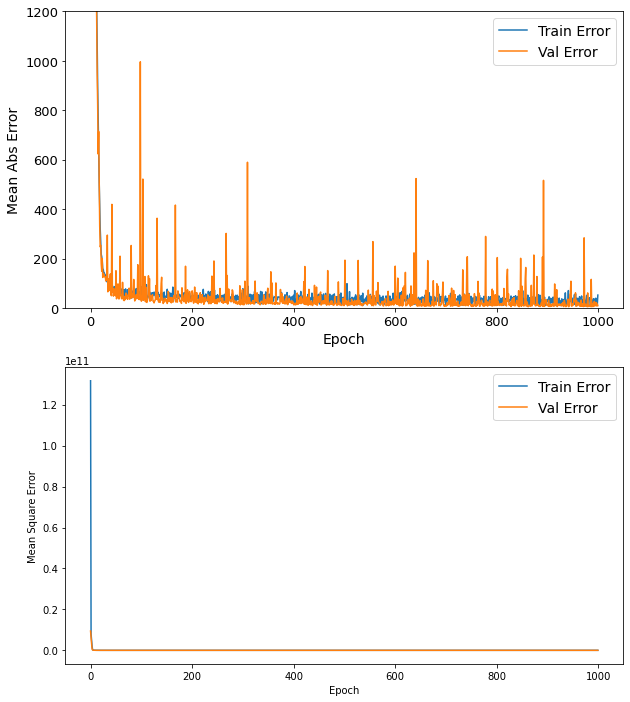

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(10,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Mean Abs Error', fontsize=14)
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.ylim([0,1200])
    plt.legend(fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    #plt.ylim([0,20000])
    plt.legend(fontsize=14)
    plt.show()

plot_history(history)

In [10]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} local1".format(mae))

182/182 - 0s - loss: 205.9920 - mae: 9.6606 - mse: 205.9920 - 233ms/epoch - 1ms/step
테스트 세트의 평균 절대 오차:  9.66 local1
